In [985]:
import pandas as pd
import numpy as np
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse('C:/Users/srava/BedfordProjects/zika/results/aligned.fasta', "fasta"):
        strains.append(str(record.id))
        genomes.append(str(record.seq))

In [986]:
dataa = pd.read_csv("DistanceMatrix")

In [988]:
pairwise_distance = dataa.to_numpy()[np.triu_indices(486, k = 1)]

In [989]:
pairwise_distance

array([12., 15., 14., ..., 36., 17., 47.])

In [940]:
dataa_subset = dataa.loc[0:49, 'strain 1':'strain 50']

In [941]:
pairwise_distance_subset = dataa_subset.to_numpy()[np.tril_indices(len(genomes), k = 1)]

In [1034]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2,metric='precomputed',perplexity = 25.95)
X_transformed = embedding.fit_transform(dataa)

In [1035]:
MDS_df = pd.DataFrame(X_transformed,columns=['cluster ' + str(i) for i in range(1,3)])
print(MDS_df.head())

   cluster 1  cluster 2
0  10.480462  -3.761963
1  10.985117  -5.079104
2  10.554556  -2.940128
3  11.446314  -2.129033
4  11.569647  -1.746949


In [1036]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [1037]:
metadata_df.head()

strain virus accession        date   region           country  \
0  1_0015_PF  zika  KX447511  2014-01-XX  oceania  french_polynesia   
1  1_0016_PF  zika  KX447520  2014-01-XX  oceania  french_polynesia   
2  1_0030_PF  zika  KX447515  2013-11-XX  oceania  french_polynesia   
3  1_0035_PF  zika  KX447514  2014-01-XX  oceania  french_polynesia   
4  1_0038_PF  zika  KX447517  2014-01-XX  oceania  french_polynesia   

           division              city       db segment           authors  \
0  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   
1  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   
2  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   
3  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   
4  french_polynesia  french_polynesia  genbank  genome  Pettersson et al   

                                             url  \
0  https://www.ncbi.nlm.nih.gov/nuccore/KX447511   
1  https://www.ncbi.nlm.nih.gov/nuccore/KX447520   
2  https://www.ncbi.nlm.nih.gov/nuccore/KX447515   
3  https://www.ncbi.nlm.nih.gov/nuccore/KX447514   
4  https://www.ncbi.nlm.nih.gov/nuccore/KX447517   

                                               title  \
0  How Did Zika Virus Emerge in the Pacific Islan...   
1  How Did Zika Virus Emerge in the Pacific Islan...   
2  How Did Zika Virus Emerge in the Pacific Islan...   
3  How Did Zika Virus Emerge in the Pacific Islan...   
4  How Did Zika Virus Emerge in the Pacific Islan...   

                        journal                                     paper_url  
0  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507  
1  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507  
2  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507  
3  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507  
4  MBio 7 (5), e01239-16 (2016)  https://www.ncbi.nlm.nih.gov/pubmed/27729507

In [1038]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [1039]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [1040]:
result_strains.head()

strain virus accession        date         region  \
0  DOM/2016/MA_WGS16_024  zika  KY785435  2016-07-07  north_america   
1       DOM/2016/BB_0180  zika  KY014304  2016-04-18  north_america   
2       DOM/2016/BB_0115  zika  KY014321  2016-04-11  north_america   
3       DOM/2016/BB_0208  zika  KY014300  2016-04-20  north_america   
4  DOM/2016/MA_WGS16_007  zika  KY785453  2016-05-10  north_america   

              country            division                city       db  \
0  dominican_republic  dominican_republic  dominican_republic  genbank   
1  dominican_republic  dominican_republic  dominican_republic  genbank   
2  dominican_republic  dominican_republic  dominican_republic  genbank   
3  dominican_republic  dominican_republic  dominican_republic  genbank   
4  dominican_republic  dominican_republic  dominican_republic  genbank   

  segment       authors                                            url  \
0  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY785435   
1  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY014304   
2  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY014321   
3  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY014300   
4  genome  Metsky et al  https://www.ncbi.nlm.nih.gov/nuccore/KY785453   

                                             title  \
0  Zika virus evolution and spread in the Americas   
1  Zika virus evolution and spread in the Americas   
2  Zika virus evolution and spread in the Americas   
3  Zika virus evolution and spread in the Americas   
4  Zika virus evolution and spread in the Americas   

                             journal  \
0  Nature 546 (7658), 411-415 (2017)   
1  Nature 546 (7658), 411-415 (2017)   
2  Nature 546 (7658), 411-415 (2017)   
3  Nature 546 (7658), 411-415 (2017)   
4  Nature 546 (7658), 411-415 (2017)   

                                      paper_url  
0  https://www.ncbi.nlm.nih.gov/pubmed/28538734  
1  https://www.ncbi.nlm.nih.gov/pubmed/28538734  
2  https://www.ncbi.nlm.nih.gov/pubmed/28538734  
3  https://www.ncbi.nlm.nih.gov/pubmed/28538734  
4  https://www.ncbi.nlm.nih.gov/pubmed/28538734

In [1041]:
finalDf = pd.concat([MDS_df, result_strains[['region','country','strain']]], axis = 1)

In [1042]:
finalDf

cluster 1  cluster 2         region             country  \
0    10.480462  -3.761963  north_america  dominican_republic   
1    10.985117  -5.079104  north_america  dominican_republic   
2    10.554556  -2.940128  north_america  dominican_republic   
3    11.446314  -2.129033  north_america  dominican_republic   
4    11.569647  -1.746949  north_america  dominican_republic   
5    11.082398  -4.125943    japan_korea               japan   
6     9.654079  -4.508934  north_america  dominican_republic   
7    11.802116  -4.786615  north_america  dominican_republic   
8     9.712538  -3.795268  north_america  dominican_republic   
9    15.969999  -0.003538  north_america  dominican_republic   
10   15.970248  -0.003079  north_america  dominican_republic   
11   10.159308  -0.481407  north_america                usvi   
12   10.304820   0.018829  north_america                usvi   
13   10.322794   0.028470  north_america                usvi   
14   10.227132  -4.627645  north_america  dominican_republic   
15   10.704089  -4.373795  north_america               haiti   
16   12.706064  -2.758430  north_america               haiti   
17   11.649827  -5.925752  north_america                 usa   
18   12.870934  -2.479632  north_america          guadeloupe   
19   10.133191  -5.791786  north_america  dominican_republic   
20   10.445156  -5.236946  north_america  dominican_republic   
21    9.797425  -3.217502  north_america  dominican_republic   
22   14.394280  -4.775873  north_america                 usa   
23   14.659733  -4.692595  north_america                 usa   
24   14.741008  -5.670043  north_america                 usa   
25   14.394280  -4.775873  north_america                 usa   
26   15.010730  -4.792107  north_america                 usa   
27   14.734464  -4.047194  north_america                 usa   
28   15.287859  -4.631460  north_america                 usa   
29   15.666208  -3.529656  north_america                 usa   
..         ...        ...            ...                 ...   
489   9.534090  -7.369911  north_america                cuba   
490  -8.350390 -12.843022  north_america              mexico   
491  -7.662880 -13.273409  north_america              mexico   
492 -11.915882  -8.261241  north_america              mexico   
493 -17.257170 -12.430997  north_america              mexico   
494   8.727952  -0.238494  north_america                usvi   
495  -9.244766  -8.484249  north_america            honduras   
496   8.518919  -4.721679  north_america  dominican_republic   
497  14.416433  -5.261662  north_america                 usa   
498  -2.625936 -15.670735  north_america              mexico   
499 -13.468055 -12.846326  north_america              mexico   
500  -9.446800 -12.048557  north_america            honduras   
501 -13.678363  -2.977329  south_america              brazil   
502  -5.199568  -8.976808  north_america              mexico   
503 -14.627694  -2.525410  south_america              brazil   
504  13.864915  -4.717741  north_america                 usa   
505  10.934059  -9.439906  north_america                 usa   
506  10.530976  -9.264742  north_america                 usa   
507 -13.686513 -14.250013  north_america              mexico   
508 -13.034740  -3.195790  south_america              brazil   
509 -13.966994  -2.946945  south_america              brazil   
510 -10.572402 -10.111140  north_america                cuba   
511  -5.546813  13.105232  north_america         puerto_rico   
512   8.793542  -5.907698  north_america  dominican_republic   
513 -12.224226 -13.451191  north_america              mexico   
514  -9.203982 -12.633476  north_america           nicaragua   
515  -9.026011 -13.103889  north_america              mexico   
516  13.640115  -4.913333  north_america                 usa   
517  13.527175  -4.141608  north_america                 usa   
518  13.044142  -4.258611  north_america                 usa   

                          strain  
0

In [1043]:
#There are 519 strains up until here

In [1044]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [1045]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [1046]:
tree = json_to_tree(json_tree_handle)

In [1047]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [1048]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [1049]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [1050]:
node_df = pd.DataFrame(node_data)

In [1051]:
node_df.head()
#there are 517 strains here

country         date  parent_date  parent_y          region  \
0  thailand  2013.136893  2010.921473    516.50  southeast_asia   
1  thailand  2016.665298  2010.921473    516.50  southeast_asia   
2  thailand  2015.043806  2010.006479    514.25  southeast_asia   
3  thailand  2016.919918  2011.367398    513.50  southeast_asia   
4  thailand  2013.722793  2011.367398    513.50  southeast_asia   

              strain    y  
0  THA/PLCal_ZV/2013  517  
1           SI_BKK01  516  
2          SV0010/15  515  
3       DMSc05684_16  514  
4         SK403/13AS  513

In [1052]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [1053]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [1054]:
node_df.shape

(517, 7)

In [1055]:
node_df.head()

country         date  parent_date  parent_y          region  \
0  thailand  2013.136893  2010.921473      0.00  southeast_asia   
1  thailand  2016.665298  2010.921473      0.00  southeast_asia   
2  thailand  2015.043806  2010.006479      2.25  southeast_asia   
3  thailand  2016.919918  2011.367398      3.00  southeast_asia   
4  thailand  2013.722793  2011.367398      3.00  southeast_asia   

              strain  y  
0  THA/PLCal_ZV/2013  0  
1           SI_BKK01  1  
2          SV0010/15  2  
3       DMSc05684_16  3  
4         SK403/13AS  4

In [1056]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [1057]:
finalDf["region"].unique()

array(['north_america', 'japan_korea', 'south_america', 'oceania',
       'china', 'southeast_asia', 'south_asia'], dtype=object)

In [1058]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [1059]:
merged_df
#this has 485 strains

cluster 1  cluster 2         region           country_x  \
0    10.480462  -3.761963  north_america  dominican_republic   
1    10.985117  -5.079104  north_america  dominican_republic   
2    10.554556  -2.940128  north_america  dominican_republic   
3    11.446314  -2.129033  north_america  dominican_republic   
4    11.569647  -1.746949  north_america  dominican_republic   
5    11.082398  -4.125943    japan_korea               japan   
6     9.654079  -4.508934  north_america  dominican_republic   
7    11.802116  -4.786615  north_america  dominican_republic   
8     9.712538  -3.795268  north_america  dominican_republic   
9    15.969999  -0.003538  north_america  dominican_republic   
10   15.970248  -0.003079  north_america  dominican_republic   
11   10.159308  -0.481407  north_america                usvi   
12   10.304820   0.018829  north_america                usvi   
13   10.322794   0.028470  north_america                usvi   
14   10.227132  -4.627645  north_america  dominican_republic   
15   10.704089  -4.373795  north_america               haiti   
16   12.706064  -2.758430  north_america               haiti   
17   11.649827  -5.925752  north_america                 usa   
18   12.870934  -2.479632  north_america          guadeloupe   
19   10.133191  -5.791786  north_america  dominican_republic   
20   10.445156  -5.236946  north_america  dominican_republic   
21    9.797425  -3.217502  north_america  dominican_republic   
22   14.394280  -4.775873  north_america                 usa   
23   14.659733  -4.692595  north_america                 usa   
24   14.741008  -5.670043  north_america                 usa   
25   14.394280  -4.775873  north_america                 usa   
26   15.010730  -4.792107  north_america                 usa   
27   14.734464  -4.047194  north_america                 usa   
28   15.287859  -4.631460  north_america                 usa   
29   15.666208  -3.529656  north_america                 usa   
..         ...        ...            ...                 ...   
456   9.534090  -7.369911  north_america                cuba   
457  -8.350390 -12.843022  north_america              mexico   
458  -7.662880 -13.273409  north_america              mexico   
459 -11.915882  -8.261241  north_america              mexico   
460 -17.257170 -12.430997  north_america              mexico   
461   8.727952  -0.238494  north_america                usvi   
462  -9.244766  -8.484249  north_america            honduras   
463   8.518919  -4.721679  north_america  dominican_republic   
464  14.416433  -5.261662  north_america                 usa   
465  -2.625936 -15.670735  north_america              mexico   
466 -13.468055 -12.846326  north_america              mexico   
467  -9.446800 -12.048557  north_america            honduras   
468 -13.678363  -2.977329  south_america              brazil   
469  -5.199568  -8.976808  north_america              mexico   
470 -14.627694  -2.525410  south_america              brazil   
471  13.864915  -4.717741  north_america                 usa   
472  10.934059  -9.439906  north_america                 usa   
473  10.530976  -9.264742  north_america                 usa   
474 -13.686513 -14.250013  north_america              mexico   
475 -13.034740  -3.195790  south_america              brazil   
476 -13.966994  -2.946945  south_america              brazil   
477 -10.572402 -10.111140  north_america                cuba   
478  -5.546813  13.105232  north_america         puerto_rico   
479   8.793542  -5.907698  north_america  dominican_republic   
480 -12.224226 -13.451191  north_america              mexico   
481  -9.203982 -12.633476  north_america           nicaragua   
482  -9.026011 -13.103889  north_america              mexico   
483  13.640115  -4.913333  north_america                 usa   
484  13.527175  -4.141608  north_america                 usa   
485  13.044142  -4.258611  north_america                 usa   

                          strain    

# Pairwise vs. Euclidean distance scatterplot

In [1060]:
#change pandas to numpy for euclidean and pairwise
#plot the points and draw the least squares regression line
#print out r
#do it for T-SNE, UMAP, MDS, all of them and add it as a panel to all the graphs
#start putting together a more cohesive github pages to look at all the panels

#make a final project notebook and start putting it together in a cohesive way
#try for flu clades (Color by clade instead of region) and see how it works

In [1061]:
#work on making this work

import pandas as pd
import numpy as np
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse('C:/Users/srava/BedfordProjects/zika/results/aligned.fasta', "fasta"):
        strains.append(str(record.id))
        genomes.append(str(record.seq))

In [1062]:
len(strains)
print(len(genomes))

519


In [1063]:
strains[:5]

['DOM/2016/MA_WGS16_024',
 'DOM/2016/BB_0180',
 'DOM/2016/BB_0115',
 'DOM/2016/BB_0208',
 'DOM/2016/MA_WGS16_007']

In [1089]:
merged_df.head()

cluster 1  cluster 2         region           country_x  \
0  10.480462  -3.761963  north_america  dominican_republic   
1  10.985117  -5.079104  north_america  dominican_republic   
2  10.554556  -2.940128  north_america  dominican_republic   
3  11.446314  -2.129033  north_america  dominican_republic   
4  11.569647  -1.746949  north_america  dominican_republic   

                  strain           country_y         date  parent_date  \
0  DOM/2016/MA_WGS16_024  dominican_republic  2016.517454  2016.177960   
1       DOM/2016/BB_0180  dominican_republic  2016.298426  2015.782991   
2       DOM/2016/BB_0115  dominican_republic  2016.279261  2015.738263   
3       DOM/2016/BB_0208  dominican_republic  2016.303901  2016.145963   
4  DOM/2016/MA_WGS16_007  dominican_republic  2016.358658  2016.145963   

   parent_y    y  
0     202.0  202  
1     188.0  188  
2     171.5  172  
3     205.0  205  
4     205.0  206

In [1092]:
pairwise_distance = pd.read_csv("DistanceMatrix")

In [1093]:
pairwise_distance.shape

(519, 519)

In [1094]:
import numpy as np
pairwise_distance_array = np.array(pairwise_distance)[np.triu_indices(519, k = 1)]

In [1101]:
len(pairwise_distance_array)

134421

In [1109]:
pairwise_df = pd.DataFrame(pairwise_distance_array)

In [1117]:
final_dataframe = pairwise_distance.merge(strains_df, how='outer', left_index=True, right_index=True)

In [1119]:
final_dataframe.head()

strain 1  strain 2  strain 3  strain 4  strain 5  strain 6  strain 7  \
0       0.0      12.0      15.0      14.0      19.0      13.0      12.0   
1      12.0       0.0      15.0      14.0      18.0      13.0      11.0   
2      15.0      15.0       0.0      17.0      21.0      16.0      14.0   
3      14.0      14.0      17.0       0.0       8.0      15.0      13.0   
4      19.0      18.0      21.0       8.0       0.0      20.0      19.0   

   strain 8  strain 9  strain 10  ...  strain 511  strain 512  strain 513  \
0      13.0      13.0       18.0  ...        35.0        39.0        16.0   
1      12.0      12.0       19.0  ...        34.0        36.0        15.0   
2      15.0      15.0       22.0  ...        36.0        40.0        19.0   
3      12.0      14.0       21.0  ...        37.0        39.0        17.0   
4      18.0      20.0       27.0  ...        41.0        40.0        24.0   

   strain 514  strain 515  strain 516  strain 517  strain 518  strain 519  \
0        30.0        35.0        28.0        10.0        11.0        11.0   
1        30.0        34.0        28.0        13.0        12.0        12.0   
2        32.0        40.0        33.0        13.0        13.0        13.0   
3        32.0        36.0        29.0        11.0         9.0        13.0   
4        34.0        35.0        35.0        14.0        13.0        15.0   

                  strain  
0  DOM/2016/MA_WGS16_024  
1       DOM/2016/BB_0180  
2       DOM/2016/BB_0115  
3       DOM/2016/BB_0208  
4  DOM/2016/MA_WGS16_007  

[5 rows x 520 columns]

In [1137]:
from scipy.spatial.distance import squareform, pdist
euclidean_distance_array = pdist(merged_df[['cluster 1','cluster 2']])

In [1138]:
len(euclidean_distance_array)

117855

In [1123]:
euclidean_df = pd.DataFrame(euclidean_distance_array)

In [1134]:
final_df = pairwise_df.merge(euclidean_df,how='inner',left_index=True, right_index=True)

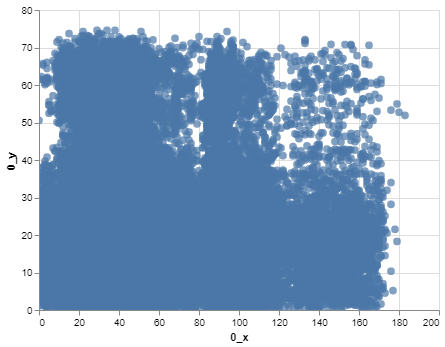

In [1135]:
import altair as alt
alt.data_transformers.disable_max_rows()
alt.Chart(final_df).mark_circle(size=60).encode(
    x='0_x',
    y='0_y',
    tooltip=['0_x', '0_y']
).interactive()
